# Identify customer segments for online retail with the use of K-means clustering

#### K-means clustering helps online retailers group customers based on their shopping habits and preferences.
#### By understanding these segments, businesses can offer personalized experiences and improve customer satisfaction.

## 1. Loading the Data:
Read data from various sources such as CSV files, Excel files, and SQL databases.

In [67]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# loading the data
retail_data = pd.read_excel('Online Retail.xlsx', engine='openpyxl')

Since it is a huge dataset while loading it here I'm using [engine='openpyxl'] for optimized file reading

## 2. Understanding the Data:
Explore basic information about the data, including head, info, and descrie..
Check for missing values in the dataset.

In [73]:
# viewing first few rows
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [77]:
retail_data.shape

(541909, 8)

In [79]:
# checking the data types and non-null values
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [81]:
# Statistical Summary
retail_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


#### Checking for null/ missing values

In [84]:
# Checking the number of missing values in each column
print('Number of missing values in each column:', retail_data.isnull().sum())

Number of missing values in each column: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


#### The Description column contains 1454 null values where CustomerID has around 135080 null values.
#### Let's check the percentage of missing values in these rows to determine whether to drop them or replace them with something else.

In [87]:
# Checking the percentage of missing values
print('Percentage of missing values: ', retail_data.isnull().sum() * 100 / len(retail_data))

Percentage of missing values:  InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


#### The Description column has only 0.2 % of null values.
#### We can see that the CustomerID column has around a quarter of missing values.
#### Also, the CustomerID column is essential to carry out further customer segmentation so it cannot contain null values.
#### Considering the above measures we will drop all the null values.

## 3. Clean the Data:
Handle missing values by either dropping or filling them.<br/>
Remove duplicate entries in the dataset.<br/>
Correct data types as necessary.

### Handling missing values

In [92]:
# dropping the missing values 
retail_data.dropna(inplace = True)

In [94]:
# resetting the indexes
retail_data.reset_index(drop = True, inplace = True)

#### Let's check the data again 

In [97]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [99]:
# Also check if our data has null values in it
print('Number of null values in each column:', retail_data.isnull().sum())

Number of null values in each column: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Correcting the data types where necessary

In [102]:
# changing the data type of CustomerID from float to integer for efficiency
retail_data['CustomerID'] = retail_data['CustomerID'].astype('int64')

In [104]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Checking for outliers

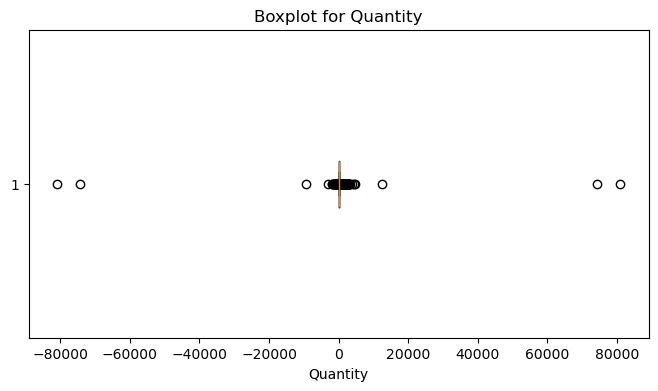

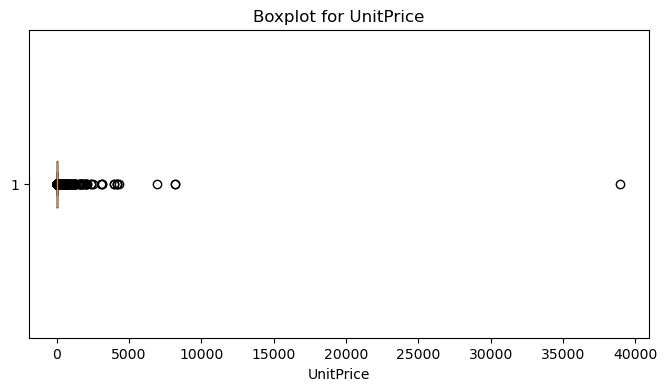

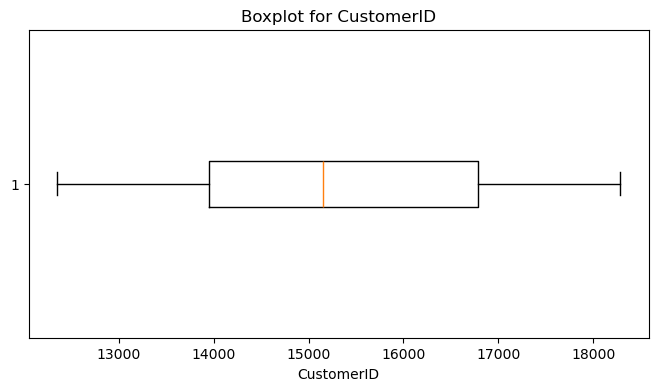

In [107]:
# Visualize data using boxplots
numerical_columns = retail_data.select_dtypes(include=['float', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(retail_data[col], vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

#### Detecting outliers using Z-scores

In [110]:
from scipy.stats import zscore

In [112]:
# Calculating Z-scores for numerical columns
z_scores = np.abs(zscore(retail_data[numerical_columns]))

In [114]:
# Threshold for identifying outliers
threshold = 3
outliers_z = (z_scores > threshold)

In [116]:
# Getting rows with outliers
outlier_rows_z = retail_data[(outliers_z).any(axis=1)]
print(f"Number of outliers detected using Z-scores: {outlier_rows_z.shape[0]}")

Number of outliers detected using Z-scores: 337


#### Outliers using IQR

In [119]:
outlier_indices = []

for col in numerical_columns:
    Q1 = retail_data[col].quantile(0.25)
    Q3 = retail_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = retail_data[(retail_data[col] < lower_bound) | (retail_data[col] > upper_bound)].index
    outlier_indices.extend(outliers)

### Dropping the outliers

In [122]:
outlier_indices = list(set(outlier_indices))

retail_data_cleaned = retail_data.drop(index=outlier_indices)
print(f"Shape of DataFrame after removing outliers: {retail_data_cleaned.shape}")

Shape of DataFrame after removing outliers: (344393, 8)


### Checking for Duplicate values

In [125]:
# checking for duplicate values
print('Number of duplicate rows:', retail_data_cleaned.duplicated().sum())

Number of duplicate rows: 4940


In [127]:
# Identifying the duplicate rows
duplicate_rows = retail_data_cleaned[retail_data_cleaned.duplicated()]
print(duplicate_rows)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
406595    581538     22068        BLACK PIRATE TREASURE CHEST         1   
406609    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
406612    581538     22992             REVOLVER WOODEN RULER          1   
406619    581538     22694                       WICKER STAR          1   
406621    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

#### As we can see the duplicates are not actually duplicates but different products bought by the same customer.
#### So we will not drop the duplicates as it is a valuable data for customer behavior analysis.
#### But there's another way to handle these duplicates and the solution is by using groupby() and agg() methods.

In [130]:
# Since we are going to perform customer segmentation we will use groupby on 'CustomerID'
# We also need aggregate of columns 'Quantity', 'UnitPrice', 'InvoiceNo' and 'Stockcode' to derive the total revenue by one customer
aggregated_data = retail_data_cleaned.groupby('CustomerID').agg({
    'Quantity': 'sum',              # Total quantity of items purchased
    'UnitPrice': 'mean',            # Average unit price
    'InvoiceNo': 'nunique',         # Number of unique transactions
    'StockCode': 'nunique',          # Number of unique products
}).reset_index()

In [132]:
# Rename columns for clarity
aggregated_data.rename(columns={
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AveragePrice',
    'InvoiceNo': 'TransactionCount',
    'StockCode': 'UniqueProducts'
}, inplace=True)

In [134]:
# Adding new column 'TotalRevenue' to the newly created dataset named aggregated_data
aggregated_data['TotalRevenue'] = aggregated_data['TotalQuantity'] * aggregated_data['AveragePrice']

In [136]:
# Let's check few rows of aggregated_data
aggregated_data.head()

,CustomerID,TotalQuantity,AveragePrice,TransactionCount,UniqueProducts,TotalRevenue
0,12347,1893,2.348976,7,96,4446.611386
1,12348,140,0.650000,3,6,91.000000
2,12349,523,2.607759,1,58,1363.857759
3,12350,196,1.581250,1,16,309.925000
4,12352,437,3.054110,8,49,1334.645890


## 4. Transform the Data:
Normalize or standardize the data<br/>
Encode categorical variables.

#### Normalizing or Standardizing the Data 

In [140]:
# Let's import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [141]:
# Selecting features for clustering
features = ['TotalQuantity', 'AveragePrice', 'TransactionCount', 'UniqueProducts', 'TotalRevenue']

In [144]:
# Standardizing the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(aggregated_data[features])

In [146]:
# Converting back to a DataFrame for convenience
normalized_df = pd.DataFrame(normalized_data, columns=features)
print(normalized_df.head())

   TotalQuantity  AveragePrice  TransactionCount  UniqueProducts  TotalRevenue
0       1.043605      0.022443          0.288905        0.534722      1.117534
1      -0.364545     -2.194782         -0.195414       -0.642213     -0.430131
2      -0.056889      0.360164         -0.437573        0.037794      0.022150
3      -0.319561     -0.979467         -0.437573       -0.511442     -0.352341
4      -0.125971      0.942668          0.409985       -0.079900      0.011770


#### Standardization (z-score scaling) centers data around 0 with a standard deviation of 1.
#### Since aggregated_data is already numeric and doesn't include categorical variables like Country, we can skip encoding.

## 5. Feature Engineering:
Create new features based on existing ones.
<br/>
Perform feature selection to identify the most relevant features.

#### Creating new features

### 5.1 Recency
Calculating the number of days since the customer’s last transaction

In [152]:
# Finding the last purchase date for each customer
latest_date = retail_data['InvoiceDate'].max()
retail_data['Recency'] = (latest_date - retail_data['InvoiceDate']).dt.days

# Aggregating Recency to get the minimum (last transaction) for each customer
recency_data = retail_data.groupby('CustomerID')['Recency'].min().reset_index()

### 5.2 Transacion Count
Counting the number of transactions made by each customer

In [158]:
frequency_data = retail_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_data.rename(columns={'InvoiceNo': 'TransactionCount'}, inplace=True)

### 5.3 Revenue
Calculating the total revenue for each customer

In [161]:
# Creating a new feature for total revenue per transaction
retail_data['Revenue'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Aggregating total revenue by customer
revenue_data = retail_data.groupby('CustomerID')['Revenue'].sum().reset_index()

### 5.4 Average Quantity per Transaction
Calculating the average quantity purchased by a customer in a single transaction

In [164]:
avg_quantity = retail_data.groupby('CustomerID')['Quantity'].mean().reset_index()
avg_quantity.rename(columns={'Quantity': 'AvgQuantityPerPurchase'}, inplace=True)

#### Merging all the features

In [167]:
# Merging all customer-level features into one DataFrame
customer_features = recency_data.merge(frequency_data, on='CustomerID')
customer_features = customer_features.merge(revenue_data, on='CustomerID')
customer_features = customer_features.merge(avg_quantity, on='CustomerID')

#### Feature Selection

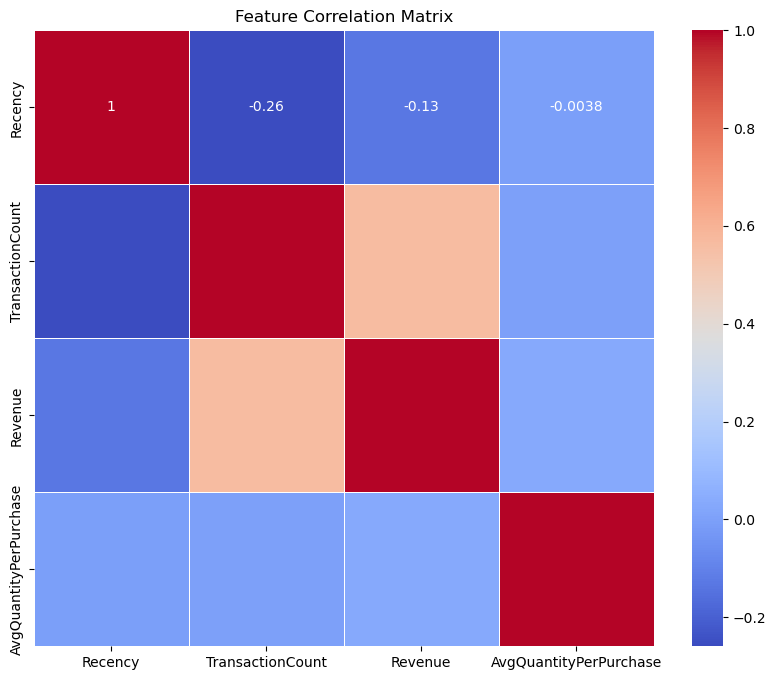

In [170]:
# Droping features that don't carry meaningful numerical information
data_for_clustering = customer_features.drop(columns=['CustomerID'], axis=1)

# Checking for correlation using correlation matrix
import seaborn as sns

# Computing correlation matrix
correlation_matrix = data_for_clustering.corr()

# Identifying Highly Correlated Feature
correlation_threshold = 0.9   # adjusting threshold as needed
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

#### Feature Selection Summary:
#### - Correlation matrix computed to identify relationships between features.
#### - Highly correlated features (above threshold) were identified and removed to avoid redundancy.
#### - The remaining features are now independent and suitable for clustering.
#### - The final dataset is ready for K-means clustering analysis.

In [173]:
# Saving the final dataset (after feature selection) for further analysis
data_for_clustering.to_csv('data_for_clustering.csv', index=False)

# Running K-Means Clustering

## 1. Standardizing the Data

Standardize the data to ensure that each feature contributes equally to the distance calculations in K-Means.
Use StandardScaler from sklearn.preprocessing to standardize the features.

In [177]:
# Loading the data
data_for_clustering = pd.read_csv('data_for_clustering.csv')

# Previewing the data to identify features to standardize
print(data_for_clustering.head())

# Initializing StandardScaler
scaler = StandardScaler()

# Standardizing the data 
# Assuminging all columns are relevant for clustering
standardized_data = scaler.fit_transform(data_for_clustering)

# Converting the standardized data back to a DataFrame for better readability
standardized_data_df = pd.DataFrame(standardized_data, columns=data_for_clustering.columns)

# Printing the standardized data
print(standardized_data_df.head())


   Recency  TransactionCount  Revenue  AvgQuantityPerPurchase
0      325                 2     0.00                0.000000
1        1                 7  4310.00               13.505495
2       74                 4  1797.24               75.516129
3       18                 1  1757.55                8.643836
4      309                 1   334.40               11.588235
    Recency  TransactionCount   Revenue  AvgQuantityPerPurchase
0  2.322023         -0.329362 -0.231001               -0.104999
1 -0.893733          0.206102  0.293432               -0.041662
2 -0.169196         -0.115176 -0.012316                0.249149
3 -0.725005         -0.436455 -0.017146               -0.064462
4  2.163220         -0.436455 -0.190312               -0.050654


## 2. Determine the Optimal Number of Clusters

Use the Elbow Method to determine the optimal number of clusters (k).
Calculate the within-cluster sum of squares (WCSS) for different values of k.
Plot the WCSS against the number of clusters and look for the "elbow point" where the WCSS starts to decrease more slowly.

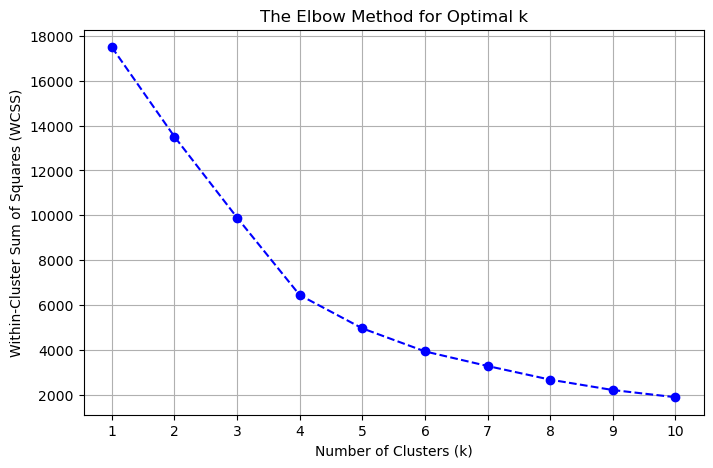

In [180]:
# Importing necessary libraries
import warnings
from sklearn.cluster import KMeans

# Suppressing warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Defining the range of k values to test
k_values = range(1, 11)

# Initializing a list to store WCSS (Within-Cluster Sum of Squares) values
wcss = []

# Calculating WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)  # Fit the K-Means model on the data
    wcss.append(kmeans.inertia_)  # Storing the WCSS value

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='blue')
plt.title('The Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

## 3. Run K-Means Clustering

Initialize the KMeans class with the optimal number of clusters and fit it to the standardized data.
Predict the cluster labels for each data point.

In [187]:
# Setting the optimal number of clusters determined from the Elbow Method
optimal_k = 4 

# Initializing the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fitting the KMeans model to the standardized data
kmeans.fit(standardized_data)

# Predicting the cluster labels for each data point
cluster_labels = kmeans.predict(standardized_data)

# Adding the cluster labels as a new column to the original standardized data
data_with_clusters = pd.DataFrame(standardized_data, columns=data_for_clustering.columns)  # Convert back to DataFrame
data_with_clusters['Cluster'] = cluster_labels


# Preview the data with cluster assignments
print(data_with_clusters.head())


    Recency  TransactionCount   Revenue  AvgQuantityPerPurchase  Cluster
0  2.322023         -0.329362 -0.231001               -0.104999        2
1 -0.893733          0.206102  0.293432               -0.041662        0
2 -0.169196         -0.115176 -0.012316                0.249149        0
3 -0.725005         -0.436455 -0.017146               -0.064462        0
4  2.163220         -0.436455 -0.190312               -0.050654        2


# Identifying Customer Segmentation

## Visualize the clusters using various charts to identify the unique attributes of each cluster

Plot the clusters to visualize how the data points are grouped.
Use scatter plots and color the points by their cluster labels.
Optionally, visualize the centroids of each cluster.

In [191]:
# importing necessary libraries 
import seaborn as sns

#### Scatter Plot using Recency and TransactionCount

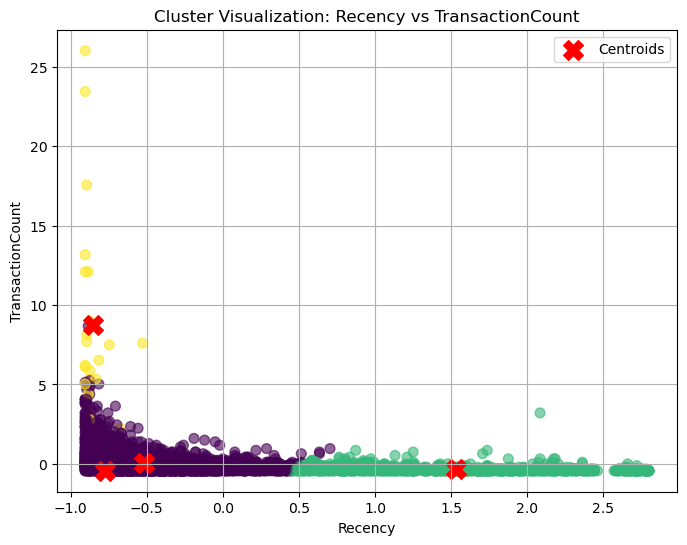

In [194]:
# Scatter plot using Recency and TransactionCount
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_with_clusters['Recency'],  # X-axis
    data_with_clusters['TransactionCount'],  # Y-axis
    c=data_with_clusters['Cluster'],  # Color by cluster
    cmap='viridis',  # Color map for clusters
    s=50,  # Size of points
    alpha=0.6  # Transparency
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # Centroid for Recency
    kmeans.cluster_centers_[:, 1],  # Centroid for TransactionCount
    c='red', marker='X', s=200, label='Centroids'
)
plt.title('Cluster Visualization: Recency vs TransactionCount')
plt.xlabel('Recency')
plt.ylabel('TransactionCount')
plt.legend()
plt.grid()
plt.show()

## Scatter Plot using Revenue and AvgQuantityPerPurchase

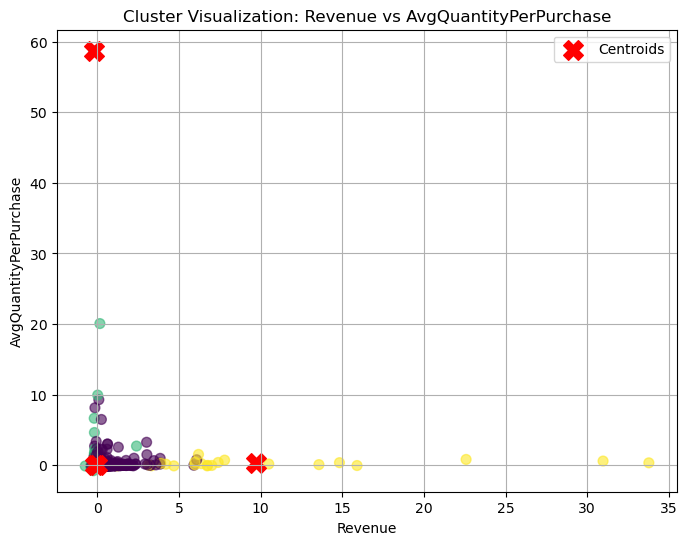

In [197]:
# Scatter plot using Revenue and AvgQuantityPerPurchase
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_with_clusters['Revenue'],  # X-axis
    data_with_clusters['AvgQuantityPerPurchase'],  # Y-axis
    c=data_with_clusters['Cluster'],  # Color by cluster
    cmap='viridis',  # Color map for clusters
    s=50,  # Size of points
    alpha=0.6  # Transparency
)
plt.scatter(
    kmeans.cluster_centers_[:, 2],  # Centroid for Revenue
    kmeans.cluster_centers_[:, 3],  # Centroid for AvgQuantityPerPurchase
    c='red', marker='X', s=200, label='Centroids'
)
plt.title('Cluster Visualization: Revenue vs AvgQuantityPerPurchase')
plt.xlabel('Revenue')
plt.ylabel('AvgQuantityPerPurchase')
plt.legend()
plt.grid()
plt.show()

## Assign Cluster Labels to the Original Data

Add the cluster labels as a new column to the original dataset.
This will help in understanding the characteristics of each cluster.

In [200]:
# Adding the cluster labels as a new column to the original dataset
data_for_clustering['Cluster'] = cluster_labels

# Previewing the dataset with cluster labels
print(data_for_clustering.head())

   Recency  TransactionCount  Revenue  AvgQuantityPerPurchase  Cluster
0      325                 2     0.00                0.000000        2
1        1                 7  4310.00               13.505495        0
2       74                 4  1797.24               75.516129        0
3       18                 1  1757.55                8.643836        0
4      309                 1   334.40               11.588235        2


## Analyze Each Segment

Calculate summary statistics for each cluster to understand the characteristics of the customers in each segment.
Mean, median, and standard deviation of features within each cluster.
Compare the segments based on these statistics to identify distinctive features.

In [205]:
# Grouping data by the 'Cluster' column and calculate summary statistics
cluster_summary = data_for_clustering.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'std'],
    'TransactionCount': ['mean', 'median', 'std'],
    'Revenue': ['mean', 'median', 'std'],
    'AvgQuantityPerPurchase': ['mean', 'median', 'std']
})

# Resetting index for better readability
cluster_summary = cluster_summary.reset_index()

# Renaming columns for clarity
cluster_summary.columns = [
    'Cluster', 
    'Recency_Mean', 'Recency_Median', 'Recency_Std', 
    'TransactionCount_Mean', 'TransactionCount_Median', 'TransactionCount_Std',
    'Revenue_Mean', 'Revenue_Median', 'Revenue_Std',
    'AvgQuantityPerPurchase_Mean', 'AvgQuantityPerPurchase_Median', 'AvgQuantityPerPurchase_Std'
]

# Displaying the summary statistics
print(cluster_summary)

   Cluster  Recency_Mean  Recency_Median  Recency_Std  TransactionCount_Mean  \
0        0     38.973140            28.0    34.933178               5.599259   
1        1     13.000000            13.0          NaN               1.000000   
2        2    244.990081           240.0    68.425174               1.853021   
3        3      5.086957             2.0     9.105009              86.869565   

   TransactionCount_Median  TransactionCount_Std  Revenue_Mean  \
0                      4.0              6.512444   1823.851674   
1                      1.0                   NaN      0.000000   
2                      1.0              1.752008    460.221390   
3                     66.0             58.066032  81835.857391   

   Revenue_Median   Revenue_Std  AvgQuantityPerPurchase_Mean  \
0          897.62   3113.112127                    18.150752   
1            0.00           NaN                 12540.000000   
2          297.78    910.328298                    22.371702   
3        571

## Profile the Customer Segments

Create profiles for each customer segment based on the analysis.
Describe the typical customer in each segment (e.g., demographics, purchasing behavior).
Use visualization techniques (e.g., bar charts, box plots) to illustrate the differences between segments.


### Insights for Each Segment

1. **Cluster 0: Casual Shoppers**  
   - These customers shop occasionally and have a moderate level of engagement. Their spending and purchase quantity are quite balanced.  
   - **How to engage them:** Encourage their loyalty by offering personalized deals or exclusive recommendations based on their preferences.

2. **Cluster 1: New or Inactive Customers**  
   - These are customers who haven’t made any purchases yet or have been inactive for a while.  
   - **How to bring them back:** Send them warm welcome messages or enticing first-purchase offers to get them started.

3. **Cluster 2: At-Risk Customers**  
   - These customers have minimal activity and spend less, showing signs of losing interest.  
   - **How to win them back:** Use special discounts or promotions to re-engage them and make them feel valued.

4. **Cluster 3: Loyal VIP Customers**  
   - These are your best customers who shop frequently, spend big, and make large purchases. They are highly engaged and valuable to your business.  
   - **How to keep them happy:** Offer them exclusive perks, priority services, or loyalty rewards to ensure they feel appreciated and continue shopping with you.

## Visualizing the features 

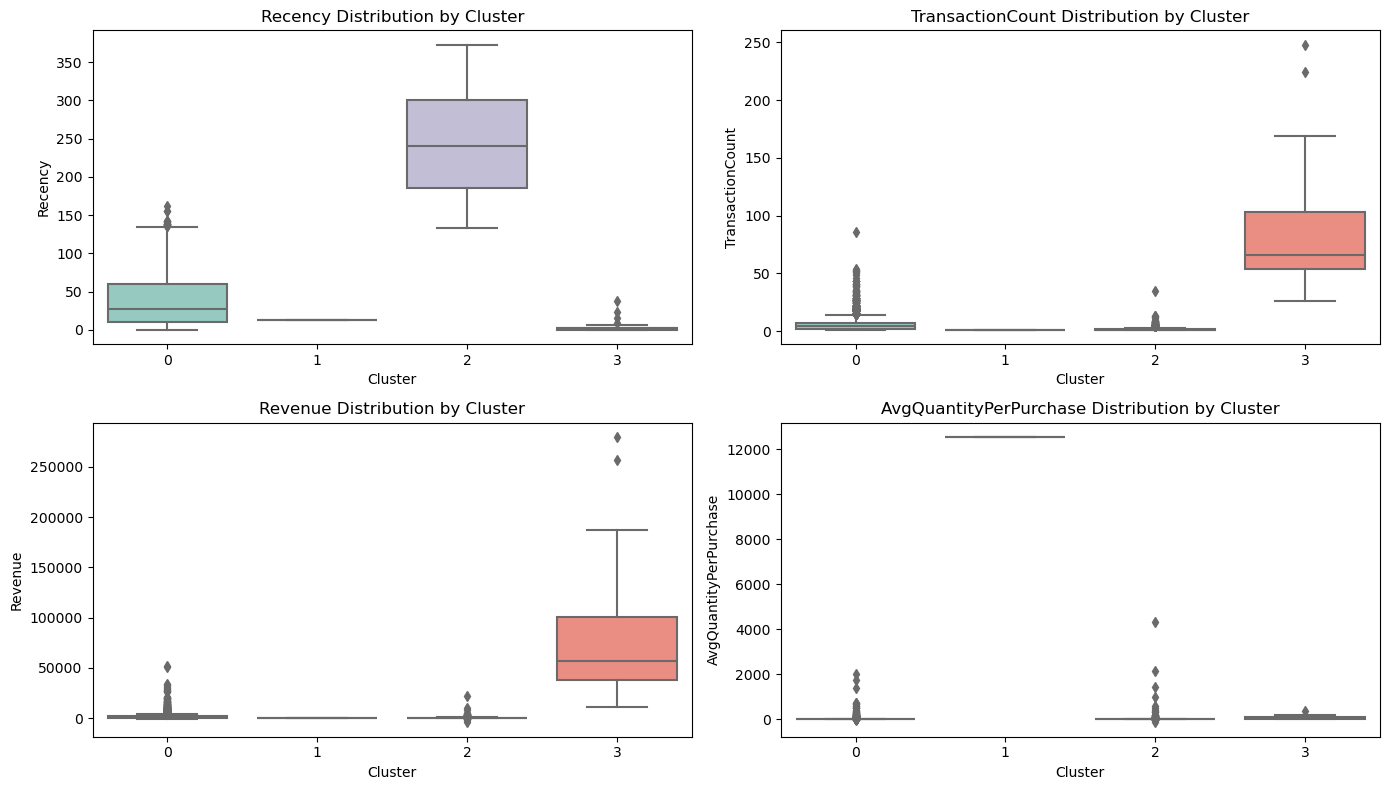

In [212]:
# Box plots for feature distributions by cluster
features = ['Recency', 'TransactionCount', 'Revenue', 'AvgQuantityPerPurchase']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=data_for_clustering, palette='Set3')
    plt.title(f'{feature} Distribution by Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Inferences

### 1. **Cluster 3 (VIP Customers)**:
   - Most valuable customers.
   - **Strategy**: Strengthen their loyalty with exclusive offers.

### 2. **Cluster 0 (Moderate Customers)**:
   - Potentially loyal, moderately active buyers.
   - **Strategy**: Convert them to VIPs by incentivizing more frequent purchases.

### 3. **Cluster 2 (At-Risk Customers)**:
   - Low engagement and minimal spending.
   - **Strategy**: Design win-back campaigns to reactivate them.

### 4. **Cluster 1 (Dormant Customers)**:
   - No revenue contribution so far.
   - **Strategy**: Target them with first-purchase discounts or special welcome offers.
